Load the dataset into a pandas dataframe and display the first 5 lines of the dataset along with the column headings.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#Loading the dataset 
dataset = pd.read_csv('data.csv')
dataset.head(n=5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Display the number of instances for each class.

In [2]:
dataset.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Create histograms of columns age and income to visually explore their distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E7D80A148>]],
      dtype=object)

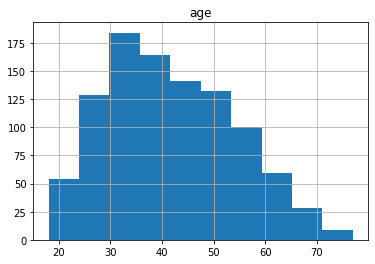

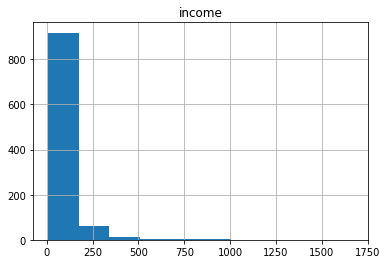

In [3]:
dataset.hist(column = 'age')
dataset.hist(column = 'income')

Split the dataset into training (80%) and testing set (20%). 

In [4]:
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,11].values

#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Perform normalization of the data using standardization.

In [5]:
#Normalizing the features 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

Model 1: Fit a logistic regression model. What is the testing misclassification rate?

In [6]:
#Fitting Logistic Regression to Training Set 
from sklearn.linear_model import LogisticRegression 
classifierObj = LogisticRegression(random_state=0) 
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate


C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.605

Model 2: Fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, I ran k-NN with different values of k and compute the testing misclassification rate. I plotted a chart with k on X-axis and testing error on the Y-axis to determine the lowest value of testing error and corresponding value of k?

[0.775, 0.74, 0.7150000000000001, 0.7, 0.69, 0.69, 0.665, 0.6599999999999999, 0.665, 0.645, 0.655, 0.655, 0.665, 0.6699999999999999, 0.6699999999999999, 0.675, 0.675, 0.7050000000000001, 0.71, 0.6950000000000001, 0.7050000000000001, 0.69, 0.6799999999999999, 0.675, 0.69]


Text(0, 0.5, 'Testing Error')

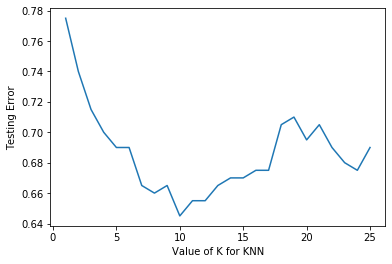

In [7]:
# import Matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

error_rates = []

# Append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    error_rates.append(1-accuracy)

print(error_rates)

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, error_rates)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')


.645 k = 10

Model 3: Fit SVM model with different kernels. Find the kernel which gives the least testing error?

In [8]:
#Fitting Classifier to Training Set.
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

classifierObj = SVC(kernel='linear') 
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred)
error_rate_linear = 1 - accuracy_linear
print('error_rate_linear: ' + str(error_rate_linear))

#########################################################
#Fitting Classifier to Training Set 
classifierObj = SVC(kernel='poly', degree=3) 
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred)
error_rate_poly = 1 - accuracy_poly
print('error_rate_poly: ' + str(error_rate_poly))

#########################################################
classifierObj = SVC(kernel='sigmoid') 
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)
                    
accuracy_sigmoid = accuracy_score(y_test, y_pred)
error_rate_sigmoid = 1 - accuracy_sigmoid
print('error_rate_sigmoid: ' + str(error_rate_sigmoid))
#the linear kernel has the least testing error

error_rate_linear: 0.61
error_rate_poly: 0.63
error_rate_sigmoid: 0.665


Model 4: Fit Naïve Bayes model and found the testing error? 

In [9]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj 
from sklearn.naive_bayes import GaussianNB 
classifierObj = GaussianNB() 
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate

0.6

Model 5: Fit Random Forest model. For Random Forest, I needed to specify the number of trees (n_estimators). In order to figure that out, I ran Random Forest with different values of n_estimators and computed the testing misclassification rate. Plotted a chart with n_estimators on X-axis and testing error on the Y-axis to find the lowest value of testing error and corresponding value of n_estimators

[0.69, 0.71, 0.74, 0.645, 0.6950000000000001, 0.655, 0.64, 0.6699999999999999, 0.655, 0.665, 0.655, 0.675, 0.6599999999999999, 0.72, 0.665, 0.62, 0.6599999999999999, 0.615, 0.7050000000000001, 0.655, 0.62, 0.6950000000000001, 0.62, 0.6699999999999999, 0.64, 0.6950000000000001, 0.6799999999999999, 0.6599999999999999, 0.6699999999999999]
range(1, 30)


Text(0, 0.5, 'Testing Error')

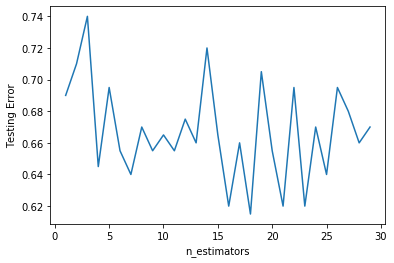

In [10]:
#Fitting Classifier to Training Set
from sklearn.ensemble import RandomForestClassifier 
# try K=1 through K=29 and record testing accuracy
n_range = range(1, 30)

error_rates_randomforest = []

for n in n_range:
    classifierObj = RandomForestClassifier(n_estimators=n, criterion='entropy') 
    classifierObj.fit(X_train, y_train)
    y_pred = classifierObj.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    error_rates_randomforest.append(1-accuracy)

print(error_rates_randomforest)
print(n_range)

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(n_range, error_rates_randomforest)
plt.xlabel('n_estimators')
plt.ylabel('Testing Error')

n_estimator = 9, testing error = .595